In [1]:
import scipy
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## SIR Models

The simplest model of an infectious disease considers the transition of members of a population between three states:

Susceptible (S) - people who have never been infected
Infected (I) - people who have an active, transmissible infection
Recovered (R) - people who have recovered from the infection and, because of immunity, can not be infected again

Models of with these three states are called "SIR" models. In SIR models $S + I + R = N$, where $N$ is the size of population.

SIR models have only two parameters:

$R_0$ - the number of people an infected individual would infect over the course of their infection if everyone else were susceptible (you can also think of this as the number of people an infected individual exposes to infection).

$T_i$ - the time an infected individual remains infectious

We can describe the behavior of this system with a set of differential equations:

${\large {{dS}\over{dt}}=-I{R_0\over{T_i}}{S\over{N}}}$ 

${\large {{dI}\over{dt}}=I{R_0\over{T_i}}{S\over{N}}-{1\over{T_i}}}$

${\large {{dR}\over{dt}}={1\over{T_i}}}$

## How do we solve this?

In [11]:
def SIR_model(t,p,params):

    # p is a vector of the current population states 

    (S,I,R) = p

    # N is population size
    
    N = np.sum(p)
    
    # get these from parameter vector for convenience

    R0 = params['R0'] 
    Ti = params['Ti']
    
    # instantaneous rate of new infections
    
    beta = R0 / Ti
    
    # define rates of state shifts
    
    # rate of S to I 
    rSI = I * beta * (S/N) 
    
    # rate of I to R
    rIR = I * (1/Ti)
    
    dS = -rSI
    dI = rSI - rIR 
    dR = rIR

    retvals = [dS,dI,dR]
    
    return(retvals)

$R_{eff}<=1$

$R_{eff}=R_0*{S\over{N}}$

${S\over{N}}={1\over{R0}}$

In [17]:
# population size

N = 320000000.0

# initial population with 1 infected individual

# 

S0 = N - 1
I0 = 1
R0 = 0

p0 = [S0,I0,R0]

# time frame to examine
# in daus

params = {}

params['R0'] = 4
params['Ti'] = 7

time_start = 0
time_end = 1000

sol = solve_ivp(SIR_model,[time_start,time_end],p0,args=(params,),dense_output=True)

time_plot = np.arange(0,365.0,1.0)

(S,I,R) = sol.sol(time_plot)

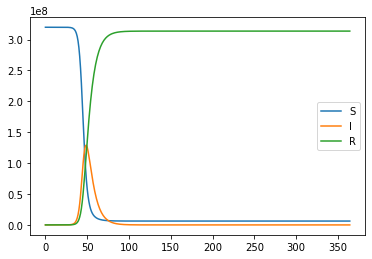

In [18]:
plt.plot(S,label="S")
plt.plot(I,label="I")
plt.plot(R,label="R")
plt.legend()

In [19]:
np.max(R)

313756703.247276

(1, 935605710.9407383)

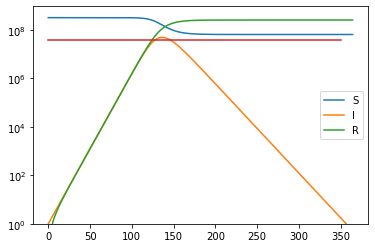

In [25]:
plt.plot(S,label="S")
plt.plot(I,label="I")
plt.plot(R,label="R")
plt.plot([0,350],[40000000,40000000])
plt.yscale('log')
plt.legend()
plt.ylim(1,)

In [21]:
# population size

N = 320000000.0

# initial population with 1 infected individual

# 

S0 = N - 1
I0 = 1
R0 = 0

p0 = [S0,I0,R0]

# time frame to examine
# in daus

params = {}

params['R0'] = 2
params['Ti'] = 7

time_start = 0
time_end = 1000

sol = solve_ivp(SIR_model,[time_start,time_end],p0,args=(params,),dense_output=True)

time_plot = np.arange(0,365.0,1.0)

(S,I,R) = sol.sol(time_plot)

(1, 935605710.9407383)

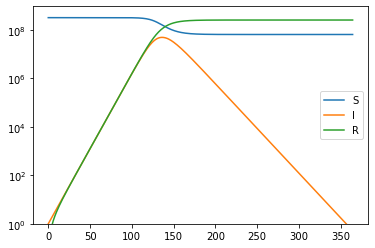

In [22]:
plt.plot(S,label="S")
plt.plot(I,label="I")
plt.plot(R,label="R")
plt.yscale('log')
plt.legend()
plt.ylim(1,)

In [24]:
np.max(R)

255364027.12026414

In [6]:
def SIR_model(t,p,R0,Ti):

    # p is a vector of the current population states 

    (S,I,R) = p

    # N is population size
    
    N = np.sum(p)
    
    # get these from parameter vector for convenience
    
    beta = R0 / Ti
    
    # define rates of state shifts
    
    # rate of S to I 
    rSI = I * beta * (S/N) 
    
    # rate of I to R
    rIR = I * (1/Ti)
    
    dS = -rSI
    dI = rSI - rIR 
    dR = rIR

    retvals = [dS,dI,dR]
    
    return(retvals)

# population size

N = 320000000.0

# initial population with 1 infected individual

p0 = [N-1,1,0]

# time frame to examine
# in daus

params = {}

R0 = 4
Ti = 7

time_start = 0
time_end = 1000

sol = solve_ivp(SIR_model,[time_start,time_end],p0,args=(R0,Ti,),dense_output=True)

time_plot = np.arange(0,365.0,1.0)

(S,I,R) = sol.sol(time_plot)

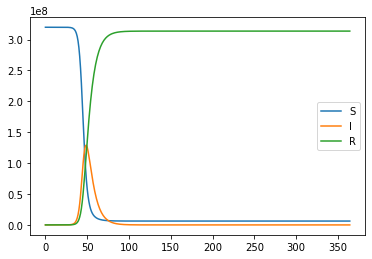

In [7]:
plt.plot(S,label="S")
plt.plot(I,label="I")
plt.plot(R,label="R")
plt.legend()

In [ ]:
# population size

N = 320000000.0

# initial population with 1 infected individual

p0 = [N-1,1,0]

# time frame to examine
# in daus

params = {}

params['R0'] = 2
params['Ti'] = 7

time_start = 0
time_end = 1000

sol = solve_ivp(SIR_model,[time_start,time_end],p0,args=(params,),dense_output=True)

time_plot = np.arange(0,365.0,1.0)

(S,I,R) = sol.sol(time_plot)

In [ ]:
plt.plot(S,label="S")
plt.plot(I,label="I")
plt.plot(R,label="R")
plt.legend()

In [26]:
def SEIR_model(t,p,params):

    # p is a vector of the current population states 

    (S,E,I,R) = p

    # N is population size
    
    N = np.sum(p)
    
    # get these from parameter vector for convenience

    R0 = params['R0'] 
    Te = params['Te']
    Ti = params['Ti']
    
    # instantaneous rate of new infections
    
    beta = R0 / Ti
    
    # define rates of state shifts
    
    rSE = I * beta * (S/N) 
    rEI = E * (1/Te)
    rIR = I * (1/Ti)
    
    dS = -rSE
    dE = rSE - rEI
    dI = rEI - rIR 
    dR = rIR

    retvals = [dS,dE,dI,dR]
    
    return(retvals)

In [27]:
# population size

N = 320000000.0

# initial population with 1 infected individual

p0 = [N-1,0,1,0]

# time frame to examine
# in daus

params = {}

params['R0'] = 4
params['Te'] = 3
params['Ti'] = 7


time_start = 0
time_end = 1000

sol = solve_ivp(SEIR_model,[time_start,time_end],p0,args=(params,),dense_output=True)

time_plot = np.arange(0,365.0,1.0)

(S,E,I,R) = sol.sol(time_plot)

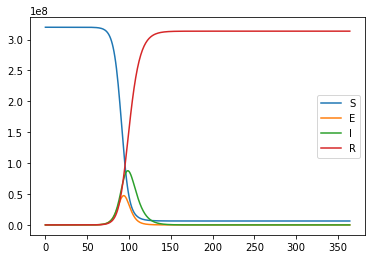

In [28]:
plt.plot(S,label="S")
plt.plot(E,label="E")
plt.plot(I,label="I")
plt.plot(R,label="R")
plt.legend()

In [38]:
# population size

N = 320000000.0

# initial population with 1 infected individual

p0 = [N-1,0,1,0]

# time frame to examine
# in daus

params = {}

params['R0'] = 2
params['Te'] = 3
params['Ti'] = 7


time_start = 0
time_end = 1000

sol = solve_ivp(SEIR_model,[time_start,time_end],p0,args=(params,),dense_output=True)

time_plot = np.arange(0,500,1.0)

(S,E,I,R) = sol.sol(time_plot)

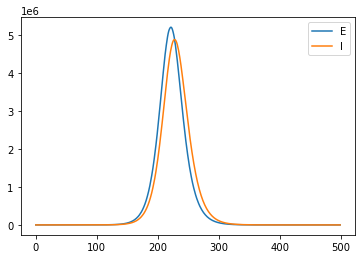

In [42]:
#plt.plot(S,label="S")
plt.plot(E/3,label="E")
plt.plot(I/7,label="I")
#plt.plot(R,label="R")
plt.legend()

In [ ]:
plt.plot(I/(S+E+I+R))

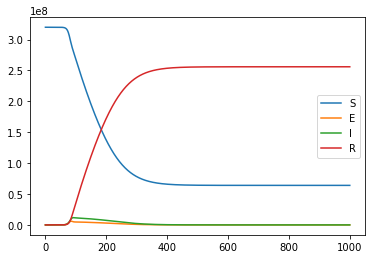

In [44]:
def SEIR_feedback_model(t,p,params):

    # p is a vector of the current population states 

    (S,E,I,R) = p

    # N is population size
    
    N = np.sum(p)
    
    # get these from parameter vector for convenience

    R0 = params['R0'] 
    Te = params['Te']
    Ti = params['Ti']
    
    # modify R based on current infection rate 
    # instantaneous rate of new infections
    
    fI = I/N
    Reff = np.clip(R0 * ((.05 - fI) / .05), 0.5,R0)
 
    beta = Reff / Ti

    # define rates of state shifts
    
    rSE = I * beta * (S/N) 
    rEI = E * (1/Te)
    rIR = I * (1/Ti)
    
    dS = -rSE
    dE = rSE - rEI
    dI = rEI - rIR 
    dR = rIR

    retvals = [dS,dE,dI,dR]
    
    return(retvals)

# population size

N = 320000000.0

# initial population with 1 infected individual

p0 = [N-1,0,1,0]

# time frame to examine
# in daus

params = {}

params['R0'] = 4
params['Te'] = 3
params['Ti'] = 7


time_start = 0
time_end = 1000

sol = solve_ivp(SEIR_feedback_model,[time_start,time_end],p0,args=(params,),dense_output=True)

time_plot = np.arange(0,1000,1.0)

(S,E,I,R) = sol.sol(time_plot)

plt.plot(S,label="S")
plt.plot(E,label="E")
plt.plot(I,label="I")
plt.plot(R,label="R")
plt.legend()

In [ ]:
def SEIR_feedback_model(t,p,params):

    # p is a vector of the current population states 

    (S,E,I,R,L) = p

    # N is population size
    
    N = np.sum(p)
    
    # get these from parameter vector for convenience

    R0 = params['R0'] 
    Te = params['Te']
    Ti = params['Ti']
    Tl = params['Tl']
    
    # modify R based on current infection rate 
    # instantaneous rate of new infections
    
    fI = I/N
    
    R = R0
 
    beta = R / Ti

    # define rates of state shifts
    
    rSE = I * beta * (S/N) 
    rEI = E * (1/Te)
    rIR = I * (1/Ti)
    
    dS = -rSE
    dE = rSE - rEI
    dI = rEI - rIR 
    dR = rIR
    
    dL = rEI - L * (1/Tl)

    retvals = [dS,dE,dI,dR,dL]
    
    return(retvals)

# population size

N = 320000000.0

# initial population with 1 infected individual

p0 = [N-1,0,1,0,0]

# time frame to examine
# in daus

params = {}

params['R0'] = 2
params['Te'] = 3
params['Ti'] = 7
params['Tl'] = 21


time_start = 0
time_end = 1000

sol = solve_ivp(SEIR_feedback_model,[time_start,time_end],p0,args=(params,),dense_output=True)

time_plot = np.arange(0,1000,1.0)

(S,E,I,R,L) = sol.sol(time_plot)

#plt.plot(S,label="S")
plt.plot(E,label="E")
plt.plot(I,label="I")
#plt.plot(R,label="R")
plt.plot(L,label="L")
plt.legend()

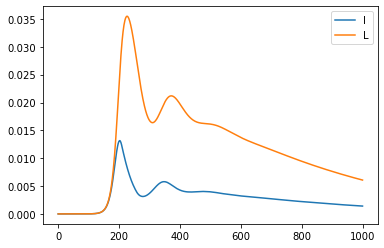

In [46]:
def SEIR_feedback_model(t,p,params):

    # p is a vector of the current population states 

    (S,E,I,R,H,L) = p

    # N is population size
    
    N = np.sum(p)
    
    # get these from parameter vector for convenience

    R0 = params['R0'] 
    Te = params['Te']
    Ti = params['Ti']
    
    Th = params['Th']
    Tl = params['Tl']
    
    # modify R based on current infection rate 
    # instantaneous rate of new infections
    
    fI = I/N
    
    fL = L/N
    Lref = .05
    Reff = np.clip(R0 * ((Lref - fL) / Lref), 0.9,R0)

    beta = Reff / Ti

    # define rates of state shifts
    
    rSE = I * beta * (S/N) 
    rEI = E * (1/Te)
    rIR = I * (1/Ti)
    
    dS = -rSE
    dE = rSE - rEI
    dI = rEI - rIR 
    dR = rIR
    
    dH = rEI - H * (1/Th)
    dL = H * (1/Th) - L * (1/Tl)
    
    retvals = [dS,dE,dI,dR,dH,dL]
    
    return(retvals)

# population size

N = 320000000.0

# initial population with 1 infected individual

p0 = [N-1,0,1,0,0,0]

# time frame to examine
# in daus

params = {}

params['R0'] = 2
params['Te'] = 3
params['Ti'] = 7
params['Th'] = 10
params['Tl'] = 28


time_start = 0
time_end = 1000

sol = solve_ivp(SEIR_feedback_model,[time_start,time_end],p0,args=(params,),dense_output=True)

time_plot = np.arange(0,1000,1.0)

(S,E,I,R,H,L) = sol.sol(time_plot)

N = S+E+I+R

#plt.plot(S,label="S")
#plt.plot(E,label="E")
plt.plot(I/N,label="I")
#plt.plot(R,label="R")
plt.plot(L/N,label="L")
plt.legend()

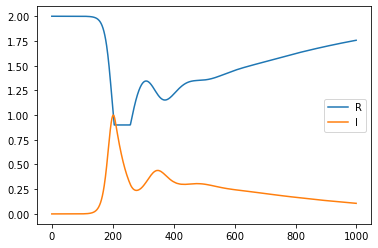

In [47]:
R0 = 2
fL = L/N
Lref = .05
Reff = np.clip(R0 * ((Lref - fL) / Lref), 0.9,R0)
plt.plot(time_plot,Reff,label='R')
plt.plot(time_plot,I/np.max(I),label="I")
plt.legend()

In [ ]:
def SEIR_feedback_model(t,p,params):

    # p is a vector of the current population states 

    (S,E,I,R,H,L) = p

    # N is population size
    
    N = np.sum(p)
    
    # get these from parameter vector for convenience

    R0 = params['R0'] 
    Te = params['Te']
    Ti = params['Ti']
    
    Th = params['Th']
    Tl = params['Tl']
    
    # modify R based on current infection rate 
    # instantaneous rate of new infections
    
    fI = I/N
    
    fL = L/N
    Lref = .05
    Reff = np.clip(R0 * ((Lref - fL) / Lref), 0.9,R0)

    beta = Reff / Ti

    # define rates of state shifts
    
    rSE = I * beta * (S/N) 
    rEI = E * (1/Te)
    rIR = I * (1/Ti)
    
    dS = -rSE
    dE = rSE - rEI
    dI = rEI - rIR 
    dR = rIR
    
    dH = rIR - H * (1/Th)
    dL = H * (1/Th) - L * (1/Tl)
    
    retvals = [dS,dE,dI,dR,dH,dL]
    
    return(retvals)

# population size

N = 320000000.0

# initial population with 1 infected individual

p0 = [N-1,0,1,0,0,0]

# time frame to examine
# in daus

params = {}

params['R0'] = 4
params['Te'] = 3
params['Ti'] = 7
params['Th'] = 10
params['Tl'] = 28


time_start = 0
time_end = 1000

sol = solve_ivp(SEIR_feedback_model,[time_start,time_end],p0,args=(params,),dense_output=True)

time_plot = np.arange(0,1000,1.0)

(S,E,I,R,H,L) = sol.sol(time_plot)

N = S+E+I+R

#plt.plot(S,label="S")
#plt.plot(E,label="E")
plt.plot(I/N,label="I")
#plt.plot(R,label="R")
plt.plot(L/N,label="L")
plt.legend()

In [ ]:
def SEIR_feedback_model(t,p,params):

    # p is a vector of the current population states 

    (S,E,I,R,H,L) = p

    # N is population size
    
    N = np.sum(p)
    
    # get these from parameter vector for convenience

    R0 = params['R0'] 
    Te = params['Te']
    Ti = params['Ti']
    
    Th = params['Th']
    Tl = params['Tl']
    
    # modify R based on current infection rate 
    # instantaneous rate of new infections

    fL = L/N
    fL_low = .00
    fL_high = .05
    mod = np.clip((fL-fL_low)/(fL_high - fL_low),0,1)
    mod *= np.exp(-t/10000)
    Rmin = .25
    Reff = Rmin + (1-mod) * (R0-Rmin)

    beta = Reff / Ti

    # define rates of state shifts
    
    rSE = I * beta * (S/N) 
    rEI = E * (1/Te)
    rIR = I * (1/Ti)
    
    dS = -rSE
    dE = rSE - rEI
    dI = rEI - rIR 
    dR = rIR
    
    dH = rIR - H * (1/Th)
    dL = H * (1/Th) - L * (1/Tl)
    
    retvals = [dS,dE,dI,dR,dH,dL]
    
    return(retvals)

# population size

N = 320000000.0

# initial population with 1 infected individual

p0 = [N-1,0,1,0,0,0]

# time frame to examine
# in daus

params = {}

params['R0'] = 4
params['Te'] = 3
params['Ti'] = 7
params['Th'] = 14
params['Tl'] = 21


time_start = 0
time_end = 1000

sol = solve_ivp(SEIR_feedback_model,[time_start,time_end],p0,args=(params,),dense_output=True)

time_plot = np.arange(0,1000,1.0)

(S,E,I,R,H,L) = sol.sol(time_plot)

N = S+E+I+R

#plt.plot(S,label="S")
#plt.plot(E,label="E")
plt.plot(I/N,label="I")
#plt.plot(R,label="R")
plt.plot(L/N,label="L")
plt.legend()

In [121]:
def SIR_model(t,p,params):

    # p is a vector of the current population states 

    (S,I,R) = p

    # N is population size
    
    N = np.sum(p)
    
    # get these from parameter vector for convenience

    R0 = params['R0'] 
    Ti = params['Ti']
    
    # instantaneous rate of new infections
    
    beta = R0 / Ti
    
    # define rates of state shifts
    
    # rate of S to I 
    rSI = I * beta * (S/N) 
    
    # rate of I to R
    rIR = I * (1/Ti)
    
    dS = -rSI
    dI = rSI - rIR 
    dR = rIR

    retvals = [dS,dI,dR]
    
    return(retvals)

def SIR_solve(gparams):
    N,R0,Ti = gparams
    p0 = [N-1,1,0]
    
    params = {}

    params['R0'] = R0
    params['Ti'] = Ti

    time_start = 0
    time_end = 1000

    sol = solve_ivp(SIR_model,[time_start,time_end],p0,args=(params,),dense_output=True)
    
    times = np.arange(time_start,time_end)
    return sol.sol(time_plot)

def SIR_fit(gparams,*args):
    Io = args[0]
    (S,I,R) = SIR_solve(gparams)
    return np.sum(np.square(I-Io))/len(S)


In [122]:
gparams = [320000000,4,7]

(Si,Ii,Ri) = SIR_solve(gparams)

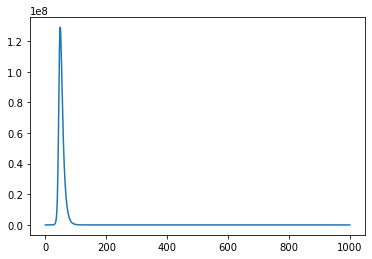

In [134]:
#plt.plot(Si)
plt.plot(Ii)
#plt.plot(Ri)

In [139]:
gguess = [300000000,3.5,8]

SIR_fit(gguess,Ii)

233840385947088.7

In [140]:
import scipy.optimize
from scipy.optimize import least_squares, minimize

In [141]:
minimize(SIR_fit,gguess,args=[Ii])

      fun: 14.516834646232944
 hess_inv: array([[ 3.02293169e+03, -3.20203852e-05, -7.25390585e-05],
       [-3.20203684e-05,  3.77055779e-13,  8.49583185e-13],
       [-7.25390160e-05,  8.49583127e-13,  1.91941026e-12]])
      jac: array([ 3.25293605e-02,  3.85684065e+07, -1.48885704e+07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 264
      nit: 24
     njev: 63
   status: 2
  success: False
        x: array([3.20000289e+08, 3.99999680e+00, 6.99999270e+00])

In [130]:
minout

      fun: 183025883670689.44
 hess_inv: array([[1.00000000e+00, 1.55354585e-08, 2.62358854e-08],
       [1.55354585e-08, 1.91507432e-01, 6.12920612e-01],
       [2.62358854e-08, 6.12920612e-01, 1.96165587e+00]])
      jac: array([0., 0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 2
     njev: 5
   status: 0
  success: True
        x: array([ 3.20000000e+08,  3.09130211e+00, -3.24759453e+00])

In [131]:
(S,I,R) = SIR_solve([ 3.20000000e+08,  3.09130211e+00, -3.24759453e+00])

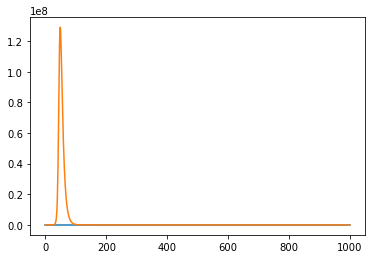

In [133]:
plt.plot(I)
plt.plot(Ii)

## How can we add hospitalizations?

S->I
I->R or I->H->R

10% of people who are infected get hospitalized 
time in I = 7
time in H = 14


In [74]:
def SIHR_model(t,p,params):

    # p is a vector of the current population states 

    (S,I,H,R) = p

    # N is population size
    
    N = np.sum(p)
    
    # get these from parameter vector for convenience

    R0 = params['R0'] 
    Ti = params['Ti']
    Th = params['Th']
    
    #fraction of infected individuals who get hospitalized
    Fih = params['Fih']
    Fir = 1 - Fih
    
    # instantaneous rate of new infections
    
    beta = R0 / Ti
    
    # define rates of state shifts

    rSI = I * beta * (S/N) 
    
    rIR = Fir * I * (1/Ti)
    rIH = Fih * I * (1/Ti)

    rHR = H * (1/Th)
    
    dS = -rSI
    dI = rSI - rIR - rIH
    dH = rIH - rHR
    dR = rIR + rHR

    retvals = [dS,dI,dH,dR]
    
    return(retvals)

In [81]:
# population size

N = 320000000.0

# initial population with 1 infected individual

# 

S0 = N - 1
I0 = 1
H0 = 0
R0 = 0

p0 = [S0,I0,H0,R0]

# time frame to examine
# in daus

params = {}

params['R0'] = 4
params['Ti'] = 7
params['Th'] = 15
params['Fih'] = .01

time_start = 0
time_end = 1000

sol = solve_ivp(SIHR_model,[time_start,time_end],p0,args=(params,),dense_output=True)

time_plot = np.arange(0,1000,1.0)

(S,I,H,R) = sol.sol(time_plot)

(0.0, 365.0)

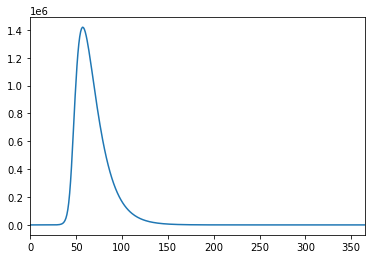

In [83]:
plt.plot(time_plot,H)
#plt.plot(time_plot,I/N)
plt.xlim(0,365)

(0.0, 365.0)

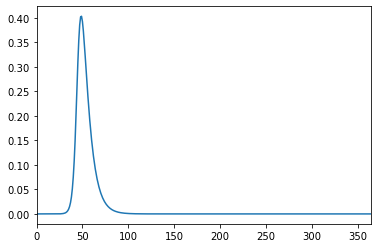

In [80]:
plt.plot(time_plot,I/N)
plt.xlim(0,365)